In [1]:
from __future__ import print_function, division
import requests
import pandas as pd
import numpy as np
import os.path
from bs4 import BeautifulSoup
import patsy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
import statsmodels.formula.api as smf
from statsmodels.tools.data import _is_using_pandas, _is_recarray
from statsmodels.tools.validation import array_like
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv(r'C:\Users\andro\Metis\module2_repo\combined.csv')
df = pd.DataFrame(data, columns=['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'YEAR',
       'SALARY'])

df=df.drop(['Player','Pos','Tm','G','GS','FGA','FG%','3PA','2PA','2P%','eFG%','FTA','DRB','ORB','PF'], axis=1)

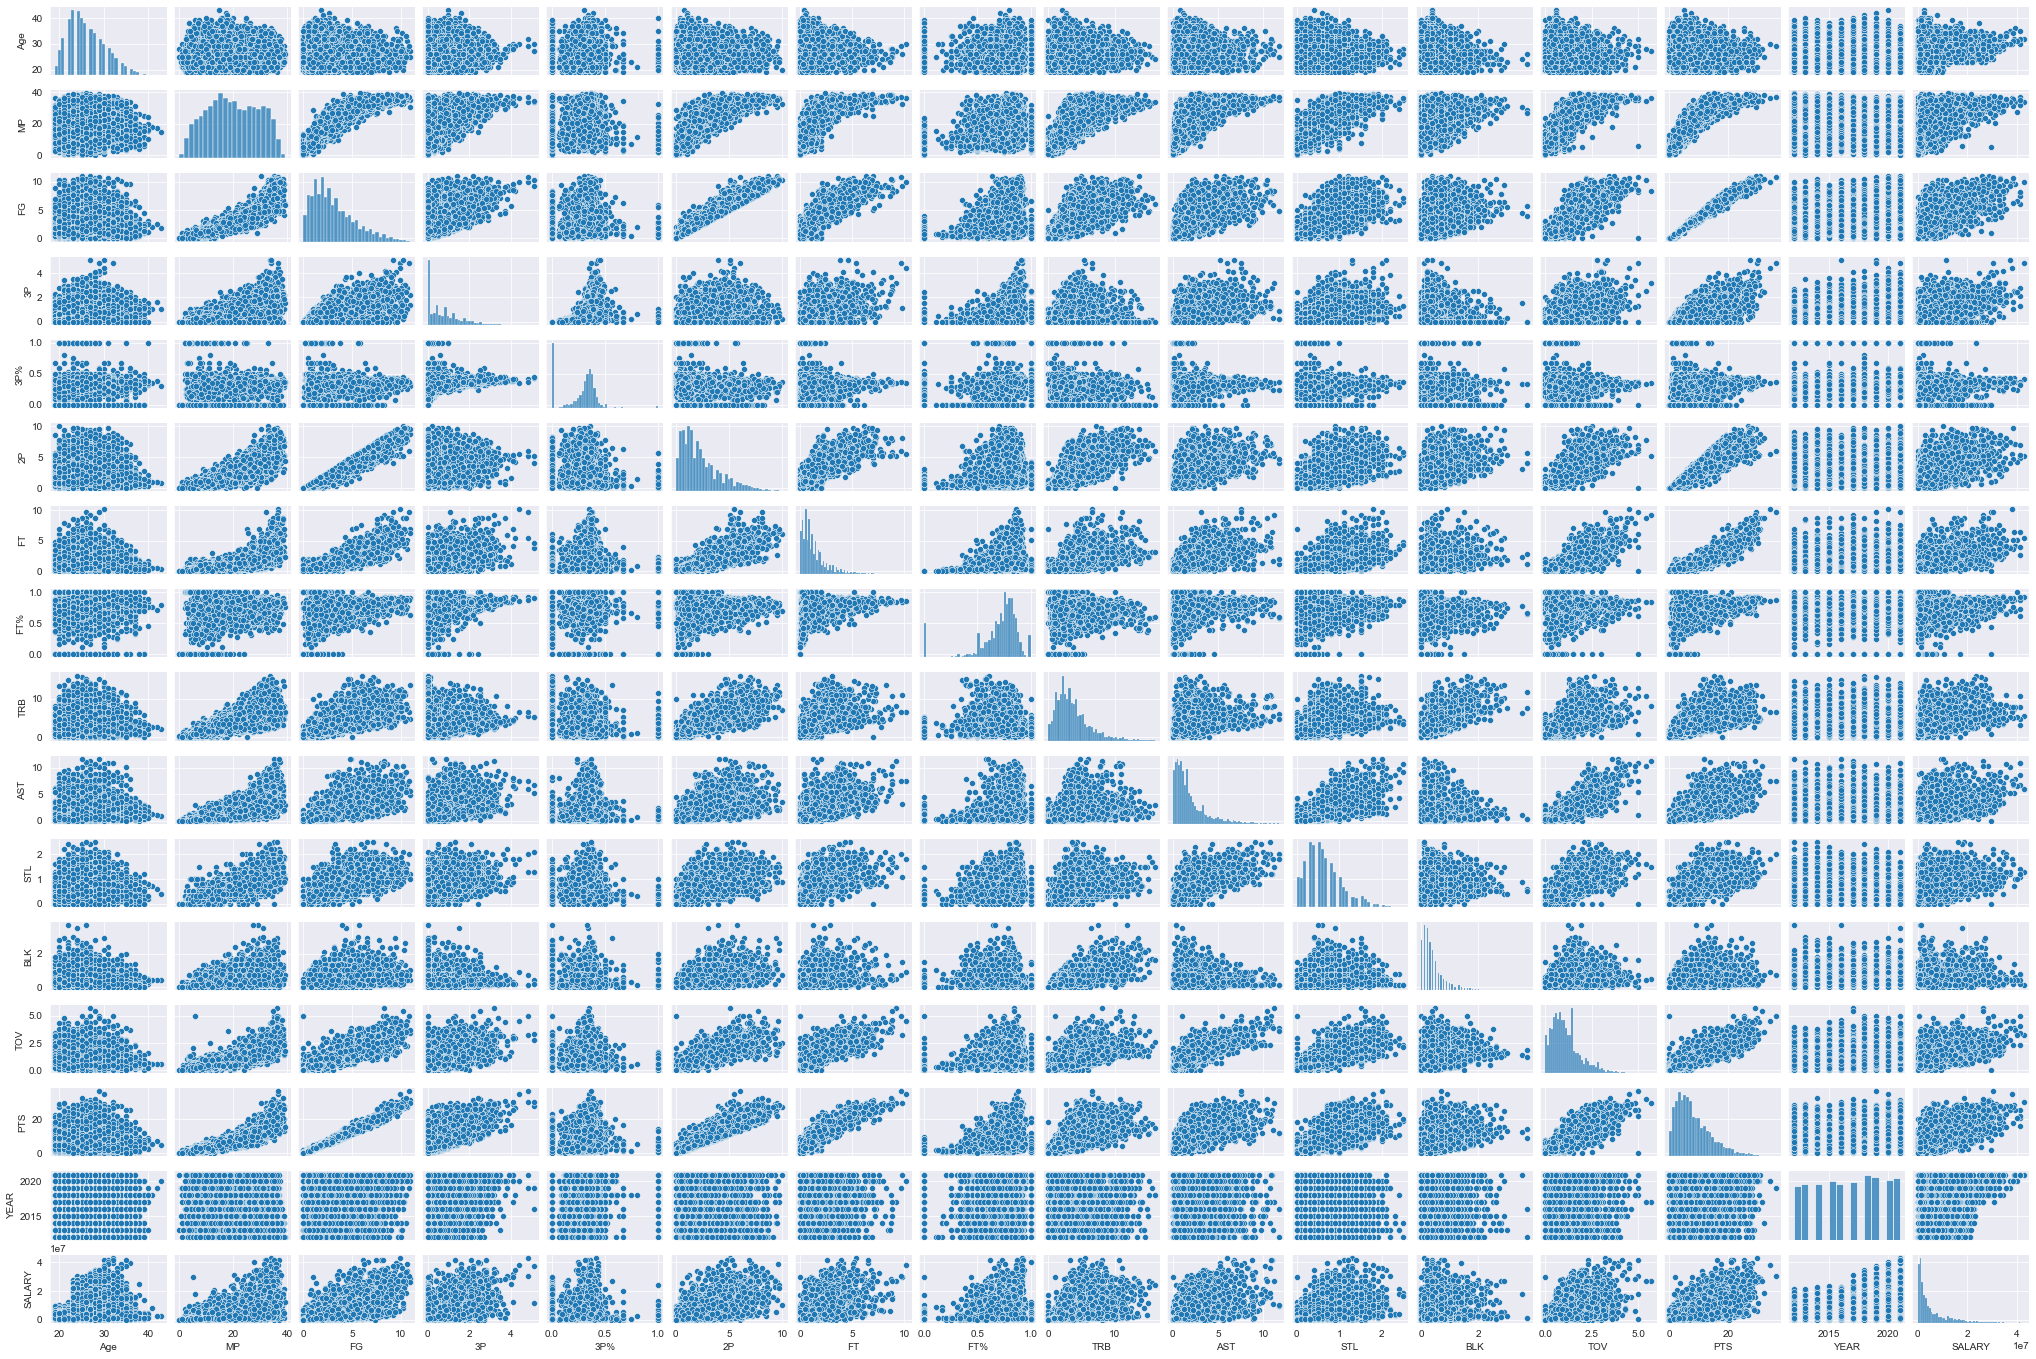

In [17]:
sns.pairplot(df, height=1.2, aspect=1.5)

In [3]:
data2 = pd.read_csv(r'C:\Users\andro\Metis\module2_repo\train_val.csv')
df2 = pd.DataFrame(data2, columns=['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'YEAR',
       'SALARY'])

data3 = pd.read_csv(r'C:\Users\andro\Metis\module2_repo\test.csv')
df3 = pd.DataFrame(data3, columns=['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'YEAR',
       'SALARY'])

In [4]:
columns = ['Age', 'MP', 'FG', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'BLK', 'PTS','YEAR']

In [5]:
#FE: Adding Approximate Value
FGM = df2['FGA']-df2['FG']
FTM = df2['FTA']-df2['FT']
Credits = (df2['PTS']+df2['TRB']+df2['AST']+df2['STL']+df2['BLK'])-(FGM-FTM)-df2['TOV']
df2['AV'] = (Credits**(.75))/21

#FE: Adding Approximate Value
FGM_test = df3['FGA']-df3['FG']
FTM_test = df3['FTA']-df3['FT']
Credits_test = (df3['PTS']+df3['TRB']+df3['AST']+df3['STL']+df3['BLK'])-(FGM_test-FTM_test)-df3['TOV']
df3['AV'] = (Credits_test**(.75))/21
df3 = df3.fillna(0)

columns2 = ['Age', 'MP', 'FG', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'BLK', 'PTS','YEAR', 'AV']

In [8]:
#FE: Adding MinutesPlayed**2
df2['MP2'] = df2['MP']**2
df3['MP2'] = df3['MP']**2

columns3 = ['Age', 'MP', 'MP2', 'FG', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'BLK', 'PTS','YEAR','AV']

In [9]:
df2 = df2.dropna()

#Fitting and Scoring model on train+val
lr = LinearRegression()
X = df2[columns3]
y = df2['SALARY']
lr.fit(X,y)
lr.score(X,y)

0.539588148067772

In [11]:
#Scoring on val set
df3=df3.dropna()

Xtest = df3[columns3]
ytest = df3['SALARY']
lr.fit(X,y)
lr.score(Xtest,ytest)

0.5738364831295844

In [ ]:
preds = lr.predict(X)
ax = sns.jointplot(x=preds,y=y, kind='reg')
ax.fig.suptitle('NBA Player Salary Predicted By Performance Stats')
ax.fig.subplots_adjust(top=0.95)

In [ ]:
ax1 = sns.distplot(ytest, hist=False, color="r", label="Actual Value")
sns.distplot(y, hist=False, color="b", label="Fitted Values" , ax=ax1)